In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/onlinefraud[1].csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334178 entries, 0 to 1334177
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1334178 non-null  int64  
 1   type            1334178 non-null  object 
 2   amount          1334178 non-null  float64
 3   nameOrig        1334178 non-null  object 
 4   oldbalanceOrg   1334178 non-null  float64
 5   newbalanceOrig  1334177 non-null  float64
 6   nameDest        1334177 non-null  object 
 7   oldbalanceDest  1334177 non-null  float64
 8   newbalanceDest  1334177 non-null  float64
 9   isFraud         1334177 non-null  float64
 10  isFlaggedFraud  1334177 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 112.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.334178e+06,1.334178e+06,1.334178e+06,1.334177e+06,1.334177e+06,1.334177e+06,1.334177e+06,1334177.0
mean,4.919732e+01,1.633423e+05,8.739388e+05,8.946563e+05,9.885948e+05,1.119685e+06,1.172258e-03,0.0
std,4.493653e+01,2.726315e+05,2.967802e+06,3.004152e+06,2.305985e+06,2.415797e+06,3.421820e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.600000e+01,1.297820e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.600000e+01,7.909786e+04,1.545000e+04,0.000000e+00,1.317423e+05,2.259574e+05,0.000000e+00,0.0
75%,4.500000e+01,2.193362e+05,1.298441e+05,1.715384e+05,9.336492e+05,1.159978e+06,0.000000e+00,0.0
max,1.370000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

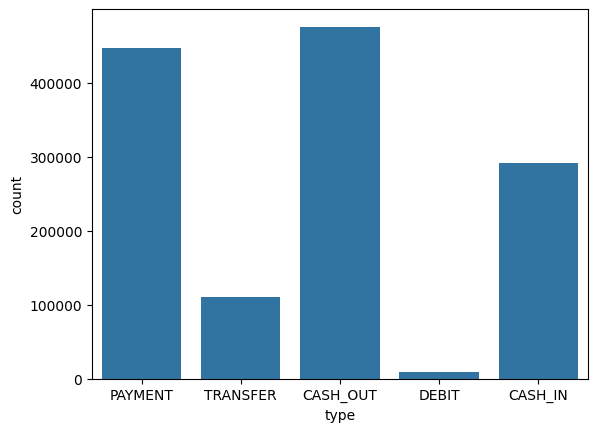

In [ ]:
sns.countplot(x='type', data=data)

<Axes: xlabel='type', ylabel='amount'>

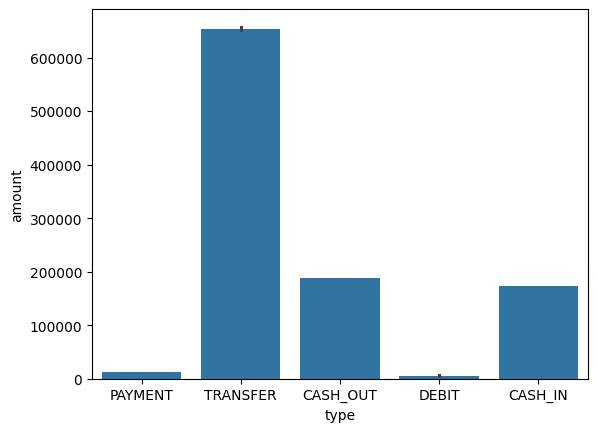

In [ ]:
sns.barplot(x='type', y='amount', data=data)

In [ ]:
data['isFraud'].value_counts()

,count
isFraud,
0.0,1332613
1.0,1564


In [ ]:
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

<Figure size 1500x600 with 0 Axes>

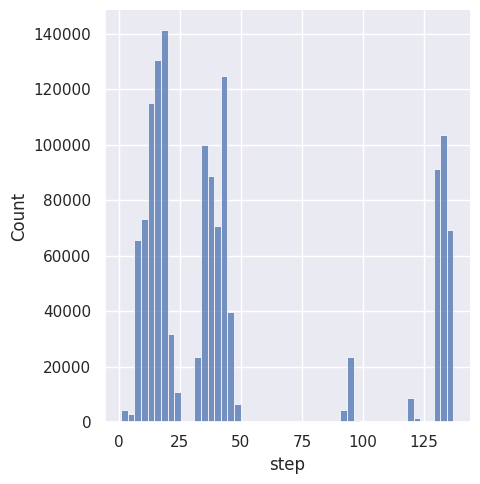

In [ ]:
plt.figure(figsize=(15, 6))
sns.displot(data['step'], bins=50)

<Axes: >

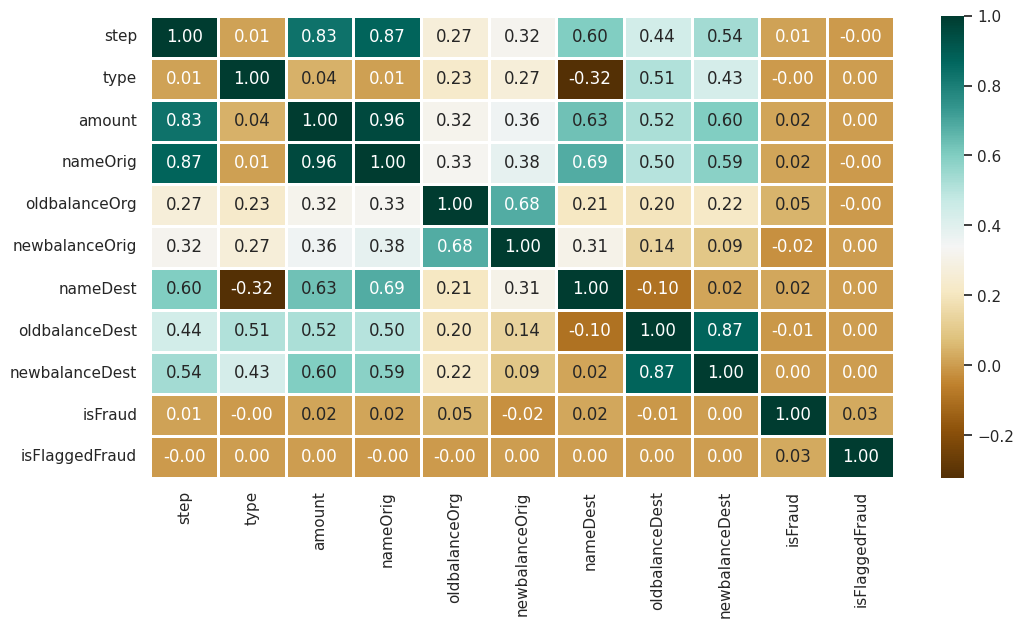

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,True,False


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [ ]:
X.shape, y.shape

((1334178, 11), (1334178,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

y_train = imputer.fit_transform(y_train.reshape(-1, 1))
y_train = y_train.ravel()
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9036332335089702
Validation Accuracy :  0.8949182014965786

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999887272838709
Validation Accuracy :  0.9989339494782019

RandomForestClassifier(criterion='entropy', n_est

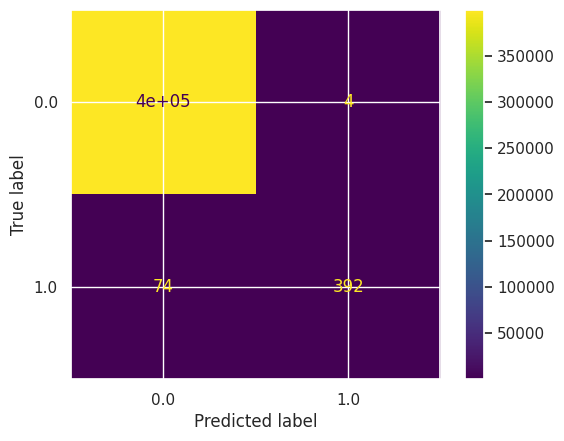

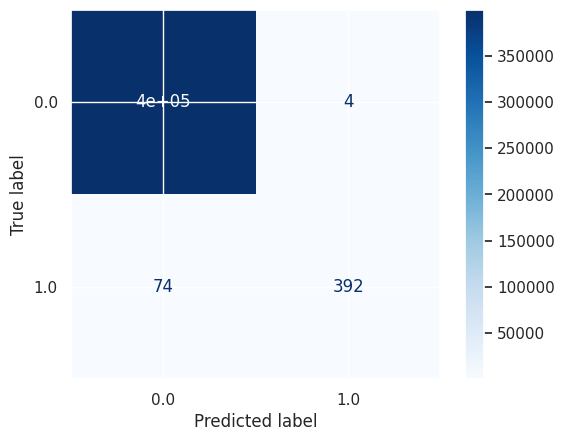

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm.plot(cmap='Blues')

plt.show()